**Assignment 4**

1.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df= pd.read_csv('/content/drive/MyDrive/Other-Material/Cricket_chirps.csv',header=0)
mat=df.to_numpy()
print("Shape of matrix loaded:",mat.shape)
print("Number of Features:",mat.shape[1]-1)
print("Number of Patterns:",mat.shape[0])


Shape of matrix loaded: (1499, 2)
Number of Features: 1
Number of Patterns: 1499


In [53]:
X=mat[:,0]
X=(np.column_stack((np.ones(np.size(X)),X)))
Y=mat[:,-1]
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.6)
X_val, X_test, Y_val, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)
print(X.shape,Y.shape)


(1499, 2) (1499,)


2.

In [95]:
sets=[(X_train,Y_train),(X_test,Y_test),(X_val,Y_val)]
alpha=[0.01, 0.001, 0.3, 0.5, 1.0]
p=0.01
epoch=2
def MSE(pred,Y):
  return np.sum(np.square(pred-Y))/Y.shape[0]
def h(w,X):
  pred=np.zeros(X.shape[0])
  for i in range(0,X.shape[0]):
    for i2 in range(0,X.shape[1]):
      pred[i]=pred[i]+w[i2]*X[i][i2]
  return pred
  

In [99]:

for si in range(1,len(sets)+1):
  X=sets[si][0]
  Y=sets[si][1]
  print(X.shape,Y.shape)
  switch={
      1:'train set',
      2:'test set',
      3:'validation set'
      }
  print(switch.get(si,"Thats weird"))

  
  for a in alpha:
    w=np.random.randint(-3,3,X.shape[1])
    jprev=-1
    num_itr=0
    while True:
      jcurr=MSE(h(w,X),Y)
      num_itr+=1
      if num_itr>epoch or (jprev!=-1 and abs(jprev-jcurr)<=p):
        print(a,' ',jcurr,jprev)
        print(w,'breaking')
        break
      jprev=jcurr
      w_jarr=h(w,X)-Y
      print(w,'before')
      for i in range(0,w.shape[0]):
        w[i]=w[i]-a*(np.sum(w_jarr*X[:,i]))/X.shape[0]
      print(w,'after')

[ 2 -1] before
[2 4] after
[2 4] before
[ 1 -5] after
0.01   10663.01001669449 2928.609348914858
[ 1 -5] breaking
[-1  2] before
[-1  1] after
[-1  1] before
[0 1] after
0.001   0.0 1.0
[0 1] breaking
[0 0] before
[ 5 90] after
[ 5 90] before
[ -457 -7997] after
0.3   19440014820.779633 2406945.6060100165
[ -457 -7997] breaking
[1 1] before
[ 0 -7] after
[ 0 -7] before
[  69 1200] after
0.5   436910418.7078464 19323.191986644408
[  69 1200] breaking
[ 0 -2] before
[ 51 903] after
[ 51 903] before
[ -15580 -272314] after
1.0   22536194376805.215 247239144.57262105
[ -15580 -272314] breaking
[0 2] before
[ 0 -1] after
[ 0 -1] before
[0 5] after
0.01   4853.2266666666665 1213.3066666666666
[0 5] breaking
[1 0] before
[1 0] after
0.001   269.65555555555557 269.65555555555557
[1 0] breaking
[1 0] before
[ 5 85] after
[ 5 85] before
[ -433 -7584] after
0.3   17565116027.744446 2154859.8266666667
[ -433 -7584] breaking
[-3 -2] before
[ 24 478] after
[ 24 478] before
[ -4122 -72073] after
0.5 

3.

[-2  1] before
[-1  4] after
[-1  4] before
[ -6 -84] after
[ -6 -84] before
[ 141 2492] after
0.1   1885622365.8196995 2199062.485809683
[ 141 2492] breaking
[1, 2, 3] [4.0, 2614.681135225376, 2199062.485809683]


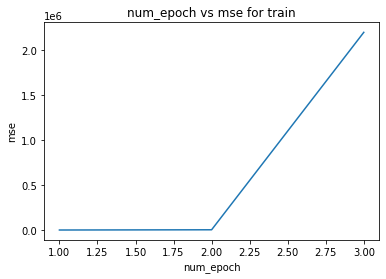

In [110]:
X=X_train
Y=Y_train
mse=[]
w=np.random.randint(-3,3,X.shape[1])
jprev=-1
num_itr=0
a=0.1
x_epoch=[0]
while True:
  jcurr=MSE(h(w,X),Y)
  num_itr+=1
  mse.append(jcurr)
  x_epoch.append(x_epoch[-1]+1)
  if num_itr>epoch or (jprev!=-1 and abs(jprev-jcurr)<=p):
    print(a,' ',jcurr,jprev)
    print(w,'breaking')
    break
  jprev=jcurr
  w_jarr=h(w,X)-Y
  print(w,'before')
  for i in range(0,w.shape[0]):
    w[i]=w[i]-a*(np.sum(w_jarr*X[:,i]))/X.shape[0]
  print(w,'after')

import matplotlib.pyplot as plt 
x_epoch.pop(-1)
x_epoch.pop(0)
mse.pop(-1)
plt.plot(x_epoch,mse)
plt.xlabel('num_epoch')
plt.ylabel('mse')
plt.title('num_epoch vs mse for train') 
print(x_epoch,mse)
plt.show() 